In [1]:
from cirq_sic import *
import recirq

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math, Markdown

In [9]:
experiment_name = "sky_ground"
base_dir = f'../experiments/data/{experiment_name}'

query = {"dataset_id": "test",
         "processor_id": "willow_pink",
         "run_type": "clean",
         "wh_implementation": "simple",
         "n_shots": 10000,
         "d": 4}
records = recirq.load_records(dataset_id=query["dataset_id"], base_dir=base_dir)
results = dict([(program.description,\
                query_records(records, {**query, "description": program.description}))\
                      for program in sky_ground_programs])

In [10]:
P = np.array(results["characterize_wh_reference_device"][0]["P"])
p = np.array(results["wh_povm_on_basis_states"][0]["p"])
C = np.array(results["basis_measurement_on_wh_states"][0]["C"])
q = np.array(results["basis_measurement_on_basis_states"][0]["q"])

context_str = "%s, run_type: %s, wh_impl: %s, n_shots: %d, d: %d" % \
                    (query["processor_id"], query["run_type"], query["wh_implementation"], query["n_shots"], query["d"])

In [11]:
def calculate_sky_ground_metrices(context_str, P, p, C, q, verbose=True):
    d = int(np.sqrt(P.shape[0]))
    Phi = np.linalg.inv(P)
    q_ = C @ Phi @ p
    P_sic = SIC_P(d)
    Phi_sic = np.linalg.inv(P_sic)
    delta_P = np.linalg.norm(P - P_sic)
    delta_Phi = np.linalg.norm(Phi - Phi_sic)
    quantumness = np.linalg.norm(np.eye(d**2) - Phi)
    quantumness_sic = np.linalg.norm(np.eye(d**2) - Phi_sic)
    delta_q = np.linalg.norm(q - q_)
    if verbose:
        display(Markdown("Sky/Ground Metrics (%s):" % context_str))
        display(Math(r'\ |P - P_{\text{SIC}}|= \ %f' % delta_P))
        display(Math(r'\ |\Phi - \Phi_{\text{SIC}}|= \ %f' % delta_Phi))
        display(Math(r'\ |I - \Phi|= \ %f' % quantumness))
        display(Math(r'\ |I - \Phi_{\text{SIC}}|= \ %f' % quantumness_sic))
        display(Math(r'\ |q - C \Phi p|= \ %f' % delta_q))
    return locals()

globals().update(calculate_sky_ground_metrices(context_str, P, p, C, q))

Sky/Ground Metrics (willow_pink, run_type: clean, wh_impl: simple, n_shots: 10000, d: 4):

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## $P$ vs $P_{\text{SIC}}$

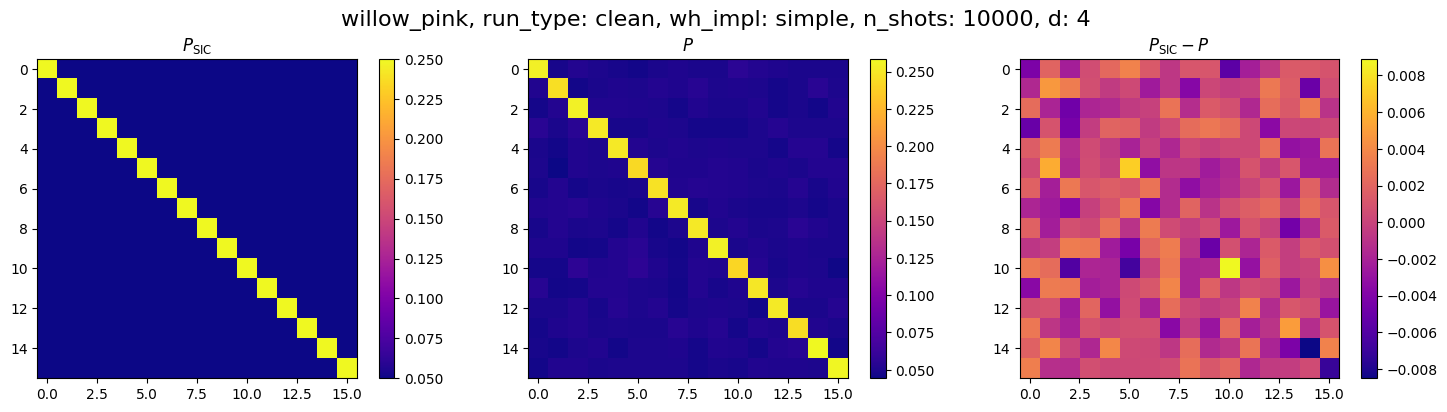

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
im1 = axes[0].imshow(P_sic, cmap='plasma')
fig.colorbar(im1, ax=axes[0], label='')
axes[0].set_title(r'$P_{\text{SIC}}$')

im2 = axes[1].imshow(P, cmap='plasma')
fig.colorbar(im2, ax=axes[1], label='')
axes[1].set_title(r'$P$')

im3 = axes[2].imshow(P_sic-P, cmap='plasma')
fig.colorbar(im3, ax=axes[2], label='')
axes[2].set_title(r'$P_{\text{SIC}}-P$')

fig.suptitle(context_str, fontsize=16)
plt.tight_layout()
plt.show()

## $q$ vs $C\Phi p$

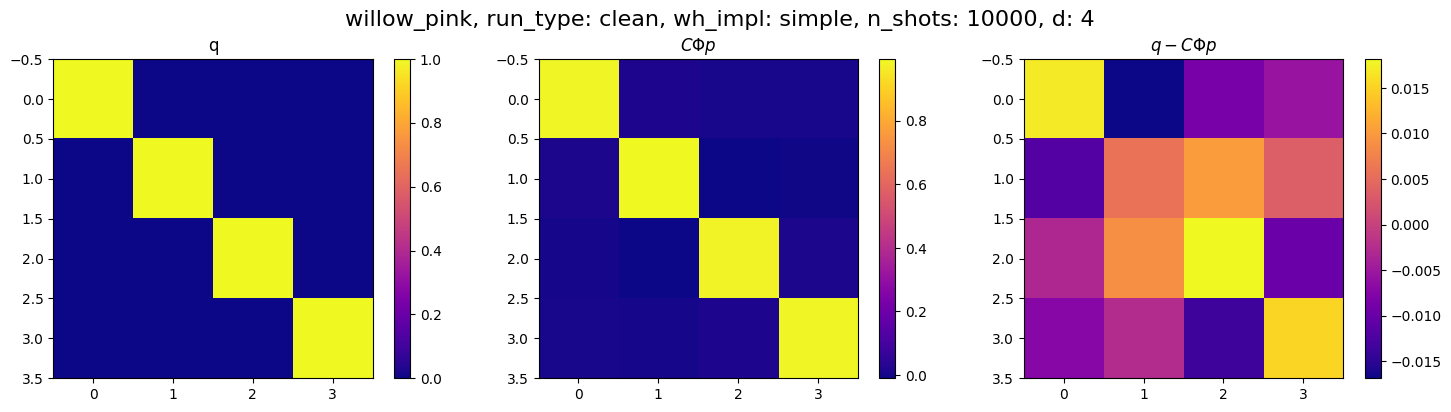

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
im1 = axes[0].imshow(q, cmap='plasma')
fig.colorbar(im1, ax=axes[0], label='')
axes[0].set_title('q')

im2 = axes[1].imshow(q_, cmap='plasma')
fig.colorbar(im2, ax=axes[1], label='')
axes[1].set_title(r'$C\Phi p$')

im3 = axes[2].imshow(q - q_, cmap='plasma')
fig.colorbar(im3, ax=axes[2], label='')
axes[2].set_title(r'$q - C\Phi p$')

fig.suptitle(context_str, fontsize=16)
plt.tight_layout()
plt.show()